In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [18]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = nx.DiGraph()

In [3]:
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.add_node.html#networkx.DiGraph.add_node
test.add_node(0, dist = np.inf, pred = None)
test.add_node(1, dist = np.inf, pred = None)
test.add_node(2, dist = np.inf, pred = None)
test.add_node(3, dist = np.inf, pred = None)
test.add_node(4, dist = np.inf, pred = None)

In [4]:
test.add_edge(0, 1, weight = 5)
test.add_edge(1, 3, weight = 2)
test.add_edge(4, 3, weight = -1)
test.add_edge(2, 4, weight = 1)
test.add_edge(1, 2, weight = 1)

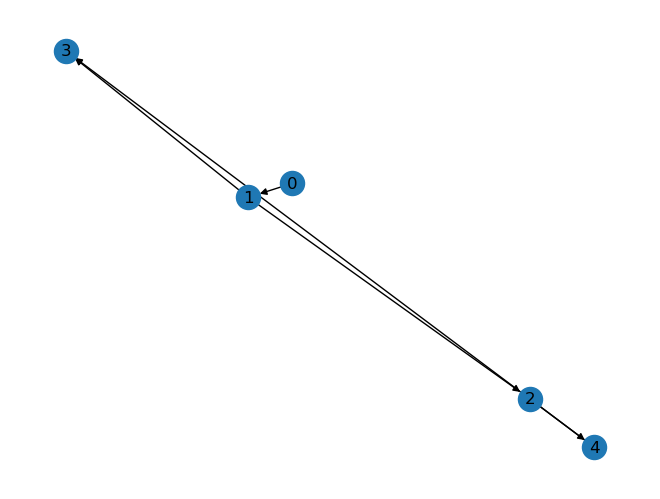

In [5]:
# https://hh2022f.amason.sites.carleton.edu/week-9-project-preparation/how-to-create-network-graphs-in-python/index.html
nx.draw(test, with_labels = True)

In [8]:
test.nodes[0]

{'dist': inf, 'pred': None}

In [9]:
test.nodes[0]['dist']

inf

In [10]:
test.nodes[1]

{'dist': inf, 'pred': None}

In [11]:
test.adj

AdjacencyView({0: {1: {'weight': 5}}, 1: {3: {'weight': 2}, 2: {'weight': 1}}, 2: {4: {'weight': 1}}, 3: {}, 4: {3: {'weight': -1}}})

In [12]:
neighbors = test.__getitem__(1)

In [13]:
neighbors

AtlasView({3: {'weight': 2}, 2: {'weight': 1}})

In [14]:
for node in neighbors:
    print(f"Node: {node} and weight: {neighbors[node]['weight']}")

Node: 3 and weight: 2
Node: 2 and weight: 1


In [15]:
for i in neighbors.keys():
    print(i)

3
2


In [125]:
# for vertex in test.nodes:
#     print(f"from: {vertex}, d[u]: {test.nodes[vertex]['dist']}")
#     neighbors = test.__getitem__(vertex)
#     for i in neighbors:
#         print(f"   to: {i}, weight: {neighbors[i]['weight']}, d[v]: {test.nodes[i]['dist']}")

In [6]:
def bellmanford(Graph, source):
    Graph.nodes[source]['dist'] = 0 # will set as long lat of Gainesville Firestation for final draft
    for i in range(len(list(Graph.nodes))):
        for from_vertex in Graph.nodes:
            neighbors = Graph.__getitem__(from_vertex)
            for to_vertex in neighbors:
                du = Graph.nodes[from_vertex]['dist']
                wt = neighbors[to_vertex]['weight']
                dv = Graph.nodes[to_vertex]['dist']
                if du + wt < dv:
                    Graph.nodes[to_vertex]['dist'] = du + wt
                    Graph.nodes[to_vertex]['pred'] = from_vertex
    return Graph
    '''
    repeat V - 1 times
    for each edge(from u, to v) with weight w in edges do:
        if dist[u] + w < dist[v] then
            dist[v] = dist[u] + w
            pred[v] = u
    '''

In [7]:
# test graph built of example from here: https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/
result = bellmanford(test, source = 0)

In [28]:
# all distances and predecessors correct except for edge(0, 3)
for vertex in result.nodes:
    if vertex == 0:
        continue
    print(f"from: 0")
    print(f"   to: {vertex}, dist: {result.nodes[vertex]['dist']}, pred: {result.nodes[vertex]['pred']}")

from: 0
   to: 1, dist: 5, pred: 0
from: 0
   to: 2, dist: 6, pred: 1
from: 0
   to: 3, dist: 6, pred: 4
from: 0
   to: 4, dist: 7, pred: 2


In [12]:
def findpath(node, Graph):
    source = 0
    path = {} # key = long lat of predecessor, value = distance
    if Graph.nodes[node]['pred'] == source:
        print(f"node: {node}")
        path[node] = Graph.nodes[node]['dist']
        print(f"dist: {Graph.nodes[node]['dist']}")
        return path
    else:
        pred = Graph.nodes[node]['pred']
        print(f"pred: {pred}")
        path[pred] = Graph.nodes[pred]['dist']
        print(f"pred's dist: {Graph.nodes[pred]['dist']}") 
        new_path = findpath(pred, Graph)
        path.update(new_path)
        return path

In [13]:
test_path = findpath(4, result)

pred: 2
pred's dist: 6
pred: 1
pred's dist: 5
node: 1
dist: 5


In [14]:
type(test_path)

dict

In [15]:
test_path

{2: 6, 1: 5}